In [3]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error, r2_score  


* Kullanılacak olan temel kütüphaneleri yüklemek için bu kodu ekledim.

* DataFrame için Pandas kütüphanesini ekledim.

* Sayısal hesaplamalar için NumPy kütüphanesini ekledim.

* Veri Görselleştirmek için Matplotlib kütüphanesini ekledim.

* Diğer eklenen fonksiyonları Scikit-Learn kütüphanesinden ekledim. 

In [4]:
data = pd.read_excel('C:\\Users\\PC\\Desktop\\AirQualityUCI.xlsx')

data.replace(-200, np.nan, inplace=True)
data.dropna(inplace=True)

data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


* Bu veri seti, şehirdeki hava kalitesi ile ilgili verileri içermektedir. Belirli zaman dilimlerinde hava kalitesinin değişimi, hava kalitesini etkileyen faktörler gibi verileri inceliyor.

* Yukarıdaki veriler, o bölgede atmosferdeki gazları ve bu gazların havaya etkisini gösteriyor.

* data.replace kısmında -200 değerleri nan ile değiştiriliyor.

* data.drop kısmında ise eğer sütunda nan değeri varsa sütun siliniyor.

Eksik Verilerin Belirlenmesi

In [5]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


* Bu kod parçasını, bir veri çerçevesinde hangi sütunların eksik değerlere sahip olduğunu ve bu eksik değerlerin sayısını hızlı bir şekilde belirlemek için kullandım. Veri analizi sürecinde eksik değerlerin tespit edilmesi, veri temizleme ve ön işleme aşamaları için önemlidir. Eksik değerlerin nasıl ele alınacağı kararlarını, bu tür kontroller sonucunda aldım.

Eksik Verilerin Doldurulması

In [6]:
imputer = SimpleImputer(strategy='mean')  
data[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']] = imputer.fit_transform(data[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']])

* Bu kod, veri setindeki belirtilen sütunların eksik değerlerini sütunların ortalamasıyla doldurur ve bu sütunların güncellenmiş halini tekrar veri setine atar.
* Bu kod satırı, eksik (missing) veri içeren bir DataFrame'in belirli sütunlarındaki eksik değerleri doldurmak için SimpleImputer sınıfını kullanıyor.

Özelliklerin ve Hedef Değerin Seçilmesi

In [7]:
# Hedef değişken (CO) ve özellikleri ayıralım
X = data.drop(['Date', 'Time', 'CO(GT)',], axis=1)  # Özellikler
y = data['CO(GT)']  # Hedef değişken

* Bu kod hücresi, bağımlı ve bağımsız değişkenleri birbirinden ayırarak modelin eğitilmesi için gerekli olan verileri hazırlıyor.

* DataFrame sütunlarını kontrol etmek için data.columns kullandım.
  
* data.drop fonksiyonu ile sütunu veri setinden çıkardım.   

Verinin Eğitim ve Test Setlerine Ayrılması

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* test_size=0.2 fonksiyonu veri setinin %20 sinin test seti olarak kullanışacağını belirtir. Geri kalan %80 eğitim seti olarak kullanılır.
  
* random_state=42 rastgelelik için başlangıç noktası belirlemek için kullanılır.

* Bu hücrenin amacı verileri eğitim ve test setleri olarak ayırmak. Veri seti eğitme ve değerlendirme olarak ikiye ayrılır.

Verinin Ölçeklendirilmesi

In [9]:
if 'Date' in X_train.columns:
    X_train = X_train.drop(['Date', 'Time'], axis=1)
if 'Date' in X_test.columns:
    X_test = X_test.drop(['Date', 'Time'], axis=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* Özelliklerin ölçeklendirmesi modelin performansı için önemlidir. Farklı ölçekler performansı olumsuz etkiler. Bu yüzden veriler uygun şekilde ölçeklendirilir.

* StandartScaler() verileri standartlaştırmak için kullanılır. 

KNNR Modelinin Eğitilmesi

In [26]:
knn_model = KNeighborsRegressor(n_neighbors=15)
knn_model.fit(X_train, y_train)  

KNeighborsRegressor(n_neighbors=15)

* KNNR modelini oluşturdum ve eğittim.

* K Komşu sayısını 15 olarak ayarladım.

* Bu kod parçası KNN algoritmasını kullanarak bir regresyon modeli oluşturur ve bu modeli eğitim verileri üzerinde eğitir.

RFR Modelinin Eğitilmesi

In [27]:
rfr_model = RandomForestRegressor(n_estimators=100, random_state=5)  
rfr_model.fit(X_train, y_train) 

RandomForestRegressor(random_state=5)

* RFR modelini oluşturdum ve eğittim.

* random_state değerini 5 yaptım. Denemeler sonucunda en başarılı sonuç veren değer 5 değeri idi.

* Bu kod parçası RF algoritmasını kullanarak bir regresyon modeli oluşturur ve bu modeli eğitir. 

KNNR Modelinin Performansının Değerlendirilmesi

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

knn_predictions = knn_model.predict(X_test)

knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

knn_success_rate = knn_r2 * 100

print(f'KNNR Modeli - R^2: {knn_r2}')
print(f'KNNR Modeli - MSE: {knn_mse}')
print(f'KNNR Modeli - Başarı Oranı: %{knn_success_rate:.2f}')


KNNR Modeli - R^2: 0.9637511474186338
KNNR Modeli - MSE: 0.07545729585006695
KNNR Modeli - Başarı Oranı: %96.38


* Bu kodu, bir KNNR modeli oluşturmak, eğitmek ve modelin performansını değerlendirmek için ekledim.

* Eğitilen KNNR modelinin performans değerlendirilmesi sonucu MSE ve R^2 değerlerini buldum.


RFR Modelinin Performansının Değerlendirilmesi

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

rfr_predictions = rfr_model.predict(X_test)

rfr_mse = mean_squared_error(y_test, rfr_predictions)
rfr_r2 = r2_score(y_test, rfr_predictions)

rfr_success_rate = rfr_r2 * 100

print(f'RFR Modeli - MSE: {rfr_mse}')
print(f'RFR Modeli - R^2: {rfr_r2}')
print(f'RFR Modeli - Başarı Oranı: %{rfr_success_rate:.2f}')


RFR Modeli - MSE: 0.06201603012048188
RFR Modeli - R^2: 0.9702081832088749
RFR Modeli - Başarı Oranı: %97.02


* Bu kod parçasını Random Forest regresyon modelinin test verileri üzerindeki tahminlerini yapması ve modelin performansını değerlendirmesi için ekledim.

* MSE ve R² gibi metrikler, modelin doğruluğunu ve genel etkinliğini anlamak için kullanılır. Bu bilgiler, modelin iyileştirilmesi veya başka bir model ile karşılaştırılması için önemli veriler sağlar.

* Kod parçasına başarı oranını göstermesi için de kod ekledim.

                                                     Sonuçların Görselleştirilmesi

                                             I. Görsel - Zaman İçinde Değer Değişimi Grafiği

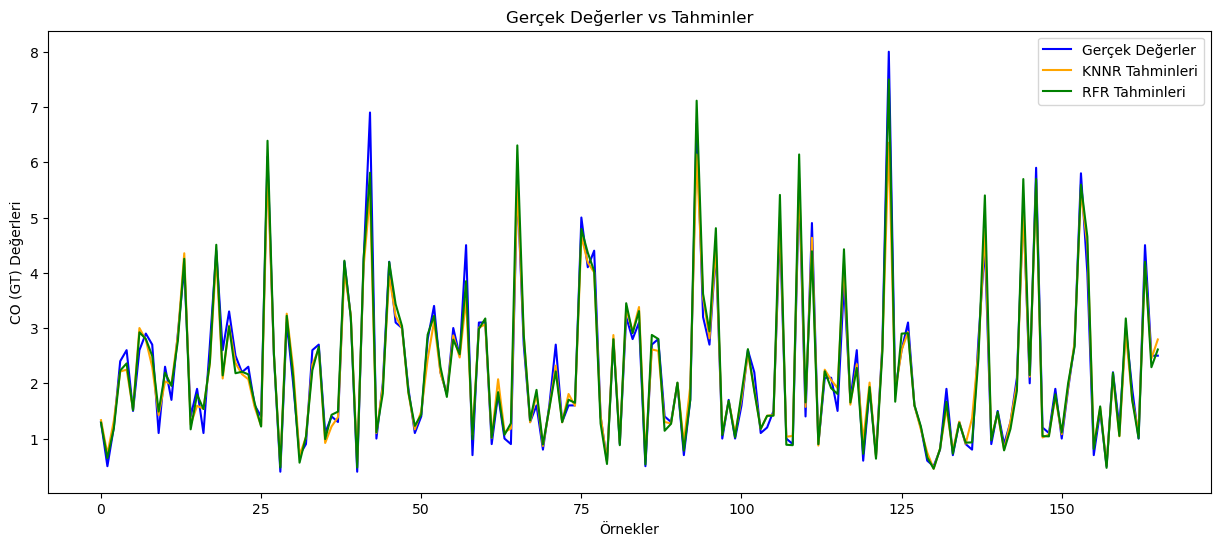

In [30]:
plt.figure(figsize=(15, 6))
plt.plot(y_test.values, label='Gerçek Değerler', color='blue')
plt.plot(knn_predictions, label='KNNR Tahminleri', color='orange')
plt.plot(rfr_predictions, label='RFR Tahminleri', color='green')
plt.title('Gerçek Değerler vs Tahminler')
plt.xlabel('Örnekler')
plt.ylabel('CO (GT) Değerleri')
plt.legend()
plt.show()

* Bu grafik, zaman içindeki değişimleri görselleştirerek, modelin genel davranışını anlamaya yardımcı olur.

* Mavi çizgi, gerçek verilerin zaman içindeki değişimini gösterir. Bu çizgi, veri setindeki gerçek CO değerlerinin nasıl bir seyir izlediğini görselleştirir.

* Turuncu çizgi, KNN modelinin tahminlerinin zaman içindeki değişimini gösterir. Bu çizgi, modelin gerçek değerlere ne kadar yakın tahminlerde bulunduğunu anlamak için kullanılır.

* Yeşil Çizgi, RFR modelinin tahminlerinin zaman içindeki değişimini gösterir. Bu çizgi, RFR modelinin performansını değerlendirmek için kullanılır.


                                                 II. Görsel - Dağılım Grafiği

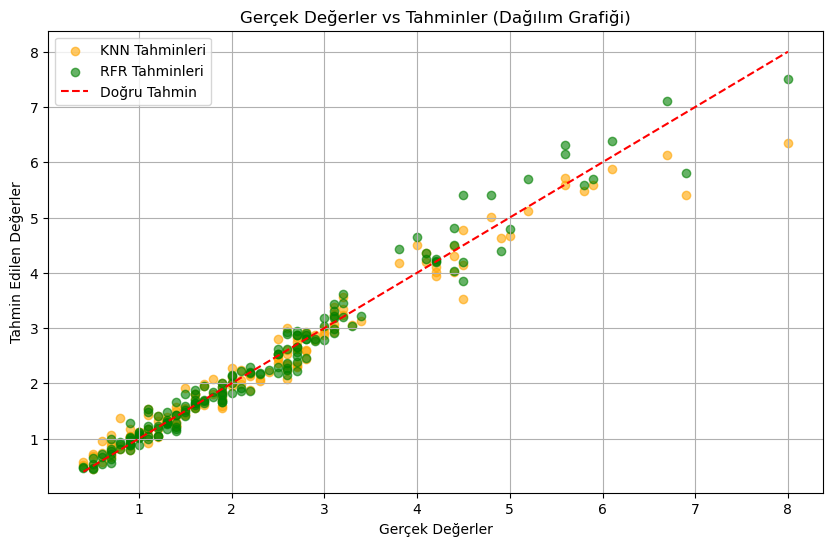

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_predictions, color='orange', label='KNN Tahminleri', alpha=0.6)
plt.scatter(y_test, rfr_predictions, color='green', label='RFR Tahminleri', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Doğru Tahmin')
plt.title('Gerçek Değerler vs Tahminler (Dağılım Grafiği)')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.legend()
plt.grid()
plt.show()

* Gerçek değerlerin ve modellerin tahmin değerlerinin dağılım grafiğini görselleştirdim.

*  Turuncu noktalar, gerçek değerlere göre KNN modeli tarafından yapılan tahminlerin dağılımını gösterir. Bu noktalar, modelin ne kadar doğru tahmin yaptığını gösteriyor.

* Yeşil noktalar, RFR modelinin tahminlerini gösterir.

* Bu grafik, modelin performansını değerlendirmek ve hangi modelin daha iyi tahminler yaptığını göstermek için oluşturuldu.

                                                 III. Görsel - Tahmin Hata Grafiği

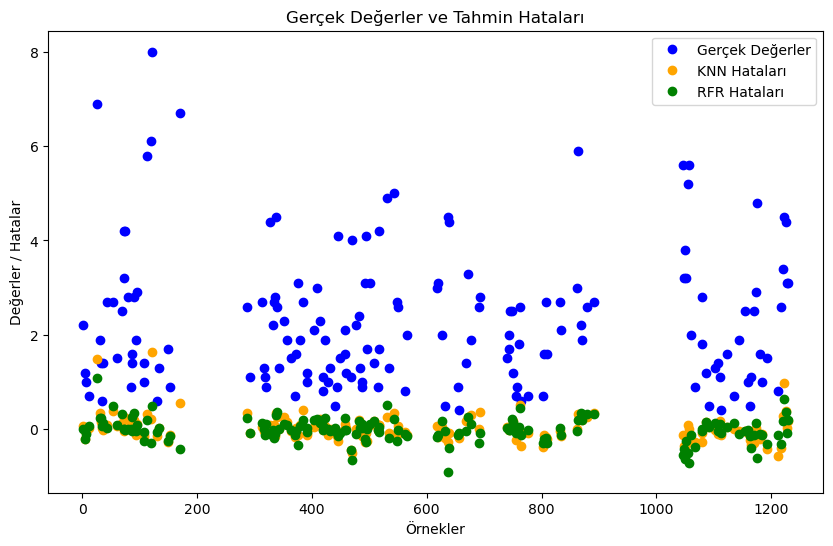

In [32]:
import matplotlib.pyplot as plt

# Tahmin hatalarını görselleştirelim
plt.figure(figsize=(10, 6))

# Gerçek değerleri çizme
plt.plot(y_test, label='Gerçek Değerler', color='blue', marker='o', linestyle='None')

# KNN ve RFR tahmin hatalarını çizme
plt.plot(y_test - knn_predictions, label='KNN Hataları', color='orange', marker='o', linestyle='None')
plt.plot(y_test - rfr_predictions, label='RFR Hataları', color='green', marker='o', linestyle='None')

# Başlık ve etiketler
plt.title('Gerçek Değerler ve Tahmin Hataları')
plt.xlabel('Örnekler')
plt.ylabel('Değerler / Hatalar')
plt.legend()
plt.show()



* Bu grafikte gerçek değerler ile tahmin değerlerinin arasındaki farkı görselleştirmeyi amaçladım.

* Turuncu noktalar, gerçek değerler ile KNN modelinin tahminleri arasındaki farkları gösterir. Bu noktalar, modelin hangi örneklerde ne kadar hata yaptığını görselleştirir.

* Yeşil noktalar, RFR modelinin tahmin hatalarını gösterir. Bu noktalar, RFR modelinin performansını değerlendirmek için kullanılır.

* Ortadaki kırmızı çizgi, tahminlerin doğru olduğu durumu temsil eder. Eğer noktalar bu çizginin üzerindeyse, tahminler gerçeğin altındadır; altında ise tahminler gerçeğin üzerindedir. Bu durum, modelin hangi örneklerde daha iyi veya daha kötü performans gösterdiğini anlamak için önemlidir.

                                                IV. Görsel - Histogram Grafiği

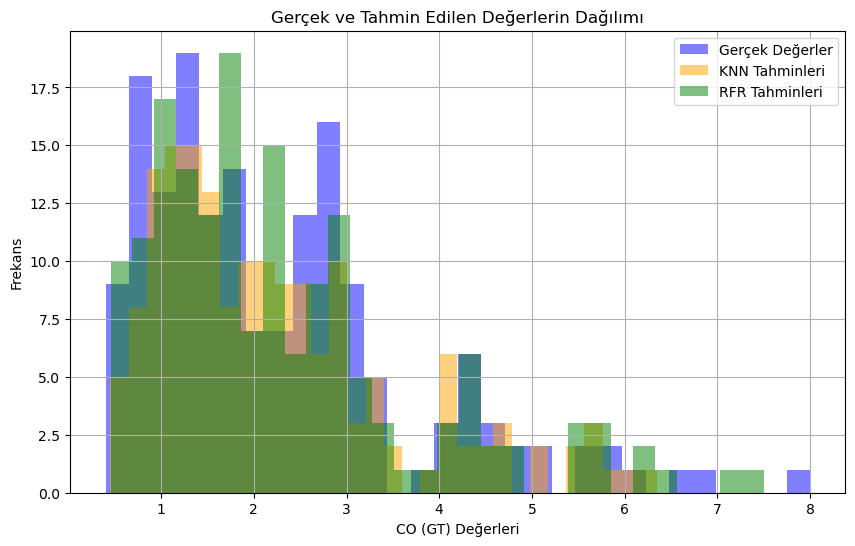

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='Gerçek Değerler', color='blue')
plt.hist(knn_predictions, bins=30, alpha=0.5, label='KNN Tahminleri', color='orange')
plt.hist(rfr_predictions, bins=30, alpha=0.5, label='RFR Tahminleri', color='green')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Dağılımı')
plt.xlabel('CO (GT) Değerleri')
plt.ylabel('Frekans')
plt.legend()
plt.grid()
plt.show()

* Gerçek değerlerin ve Tahmin edilen değerlerin histogram grafiğini görselleştirdim.

* Mavi histogram, gerçek verilerin dağılımını gösterir. Bu histogram, veri setindeki gerçek CO değerlerinin nasıl dağıldığını görselleştirir.

* Turuncu histogram, KNN modelinin tahminlerinin dağılımını gösterir. Bu histogram, modelin tahminlerinin gerçek değerlere ne kadar yakın olduğunu anlamak için kullanılır.

* Yeşil histogram, RFR modelinin tahminlerinin dağılımını gösterir. Bu histogram, RFR modelinin performansını değerlendirmek için kullanılır.

* Üç histogramın üst üste binmesi, KNN ve RFR tahminlerinin gerçek değerlere ne kadar yakın olduğunu gösteriyor. Eğer tahmin histogramları gerçek değer histogramıyla büyük ölçüde örtüşüyorsa, modellerin başarılı olduğu söylenebilir.  